Для решения задачи используется алгоритм поиска в ширину (BFS - Breadth-First Search). Алгоритм BFS обходит граф (или в данном случае, сетку) по слоям, начиная с исходной вершины (в данном случае, начальная позиция муравья) и расширяясь на все ближайшие вершины перед тем, как перейти к следующему слою.

В контексте задачи, каждая клетка считается вершиной графа, и BFS используется для определения, какие клетки могут быть достигнуты муравьем.

***

P.S Почему решил не рисовать на canvas? При реализации решения ориентировался на удобство просмотра результата, без необходимости скачивания исходников и их запуска.

Решение представлено ниже.

#### Импортируем необхомые зависимости

In [6]:
# coding=utf-8
from typing import Tuple
import matplotlib.pyplot as plt
%matplotlib inline

#### Реализация вспомогательных функций

In [7]:
def draw_grid(size):
    # type: (int) -> list
    """
    Создание двумерного массива для представления координатной сетки.
    :param size: Размер сетки
    """
    return [[1] * size for _ in range(size)]


def calculate_digit_sum(number):
    # type: (int) -> int
    """
    Функция для вычисления суммы цифр числа.
    :param number: Число
    """
    return sum(map(int, str(number)))


def is_step_available(x, y):
    # type: (int, int) -> bool
    """
    Проверка, доступна ли клетка для муравья.
    :param x: Расположение клетки по координате x
    :param y: Расположение клетки по координате y
    """
    return calculate_digit_sum(x) + calculate_digit_sum(y) <= 25

#### Реализация функции расчёта доступных для муравья клеток

In [8]:
def calculate_ant_way(start_position, grid_size):
    # type: (Tuple[int, int], int) -> Tuple[list, int]
    """
    Функция для расчёта доступных для муравья клеток, согласно условиям задачи.
    :param start_position: Стартовая позиция муравья по координатам x, y
    :param grid_size: Размер сетки по которой муравей будет ходить
    :return: Сетка с отмеченными доступными шагами муравья, Кол-во клеток в которые может сходить муравей
    """
    grid = draw_grid(grid_size)
    ant_available_positions_cnt = 0

    # Очерёдность шагов для обхода клеток
    steps_queue = [start_position]

    while steps_queue:
        x, y = steps_queue.pop(0)

        # Проверка, доступна ли текущая клетка
        if is_step_available(x, y) and grid[x][y] == 1:
            # Клетка доступна, устанавливаем значение 0 в массиве и 
            # инкрементируем счётчик кол-ва доступных клеток
            grid[x][y] = 0
            ant_available_positions_cnt += 1

            # Добавляем соседние клетки в очередь для дальнейшего обхода
            steps_queue.append((x + 1, y))
            steps_queue.append((x - 1, y))
            steps_queue.append((x, y + 1))
            steps_queue.append((x, y - 1))

    return grid, ant_available_positions_cnt

#### Расчёт доступного пути для муравья

In [9]:
# Начальная позиция муравья и размер сетки
ant_start_position_x_y = (1000, 1000)
grid_size = 2000

# Вызываем функцию расчёта доступных для муравья клеток
result_grid, ant_available_positions_cnt = calculate_ant_way(ant_start_position_x_y, grid_size)

#### Отрисовка графика с результатами

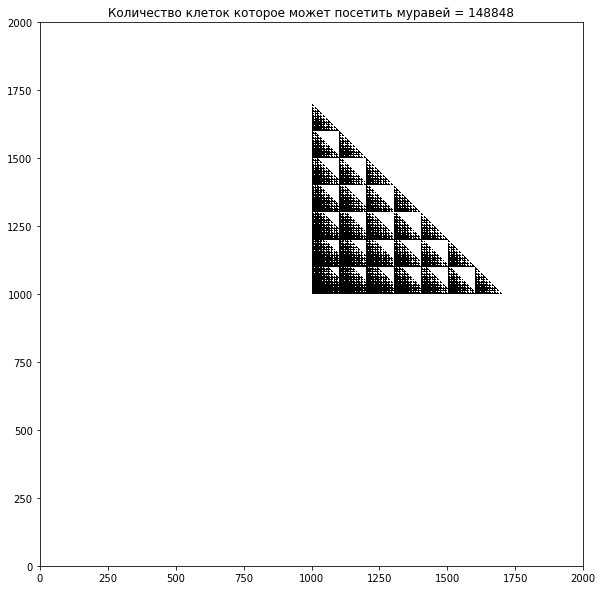

In [10]:
# Устанавливаем размер фигуры
plt.figure(figsize=(10, 10))
# Устанавливаем заголовок графика
plt.title(u'Количество клеток которое может посетить муравей = {0}'.format(ant_available_positions_cnt))
# Рисуем и показываем график
plt.imshow(result_grid, cmap='gray', origin='lower')
plt.show()